# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
#plt.style.use('seaborn-whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline


## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [2]:
# Load the dataset
#path = r'F:/AI traning with Omeda NIc/GroupA/solution/complete-eda-ideate/data/Climate_Change_Indicators.csv'
df = pd.read_csv('data/Climate_Change_Indicators.csv')# Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()



,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [ ]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [62]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
aggregate_data = df.groupby('Year').mean().reset_index()   # reset_index function for inserting index to output 
print(aggregate_data.head())


   Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
0  1900                        14.506663               350.373405   
1  1901                        14.485343               349.757140   
2  1902                        14.476262               349.299686   
3  1903                        14.492360               349.644375   
4  1904                        14.494241               349.537032   

   Sea Level Rise (mm)  Arctic Ice Area (million km²)  
0           150.408288                       8.978659  
1           150.548828                       8.947272  
2           152.174821                       9.035554  
3           150.138338                       9.056501  
4           150.667318                       8.990691  


## 2. Univariate Analysis

Analyze each climate variable independently.

Index(['Year', 'Global Average Temperature (°C)', 'CO2 Concentration (ppm)',
       'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)'],
      dtype='object')

Descriptive Statistics:
                                     count         mean        std     min  \
Year                             1048576.0  1961.504608  35.797357  1900.0   
Global Average Temperature (°C)  1048576.0    14.499538   0.866101    13.0   
CO2 Concentration (ppm)          1048576.0   350.028018  40.424093   280.0   
Sea Level Rise (mm)              1048576.0   149.990004  86.576589     0.0   
Arctic Ice Area (million km²)    1048576.0     9.000896   3.462551     3.0   

                                     25%      50%      75%     max  range  
Year                             1930.00  1962.00  1993.00  2023.0  123.0  
Global Average Temperature (°C)    13.75    14.50    15.25    16.0    3.0  
CO2 Concentration (ppm)           314.99   350.07   385.02   420.0  140.0  
Sea Level Rise (mm)                74.9

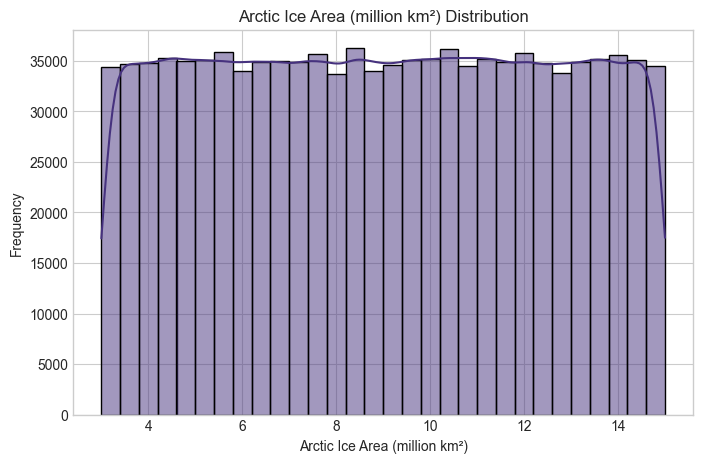

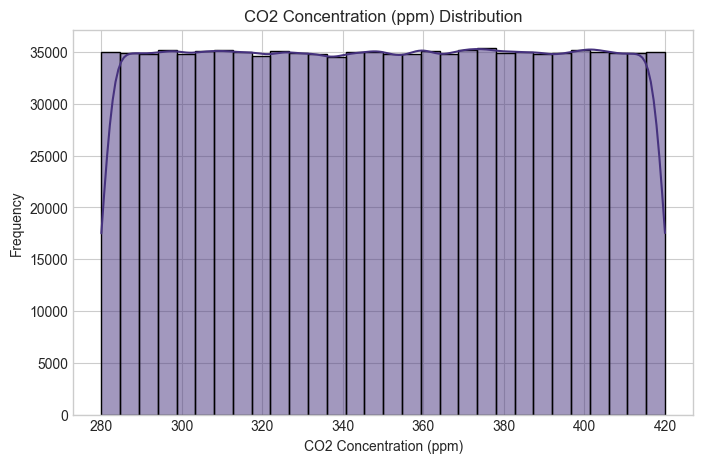

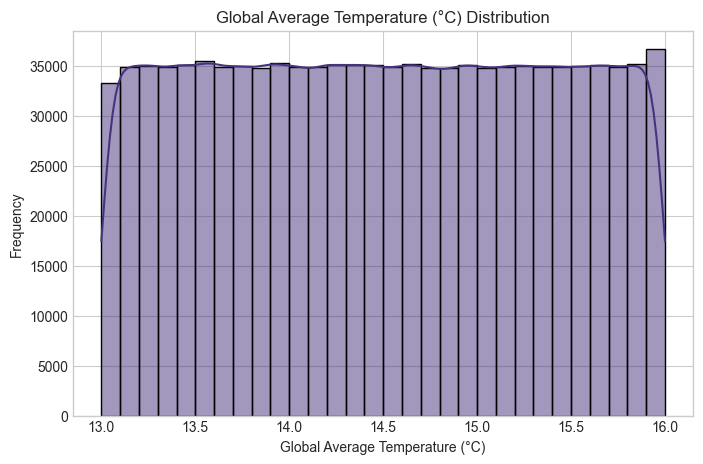

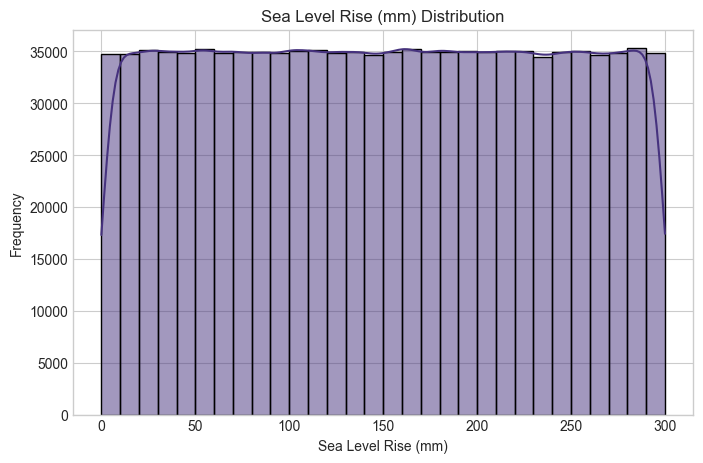

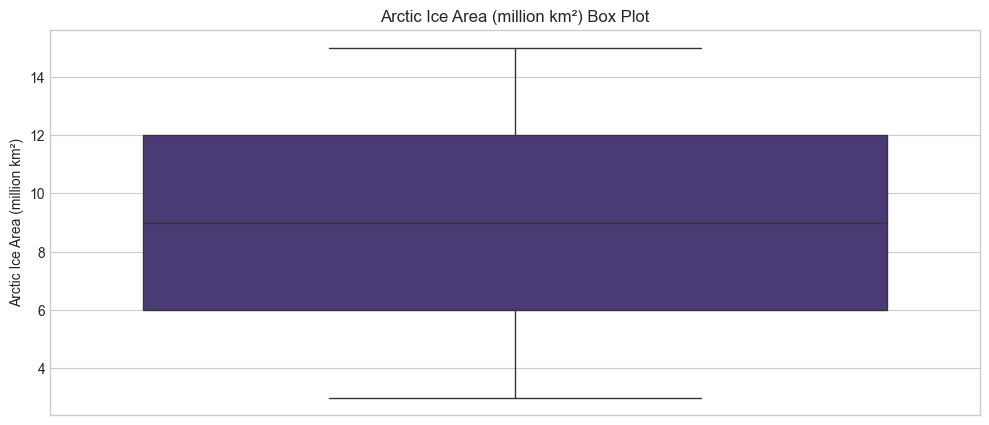

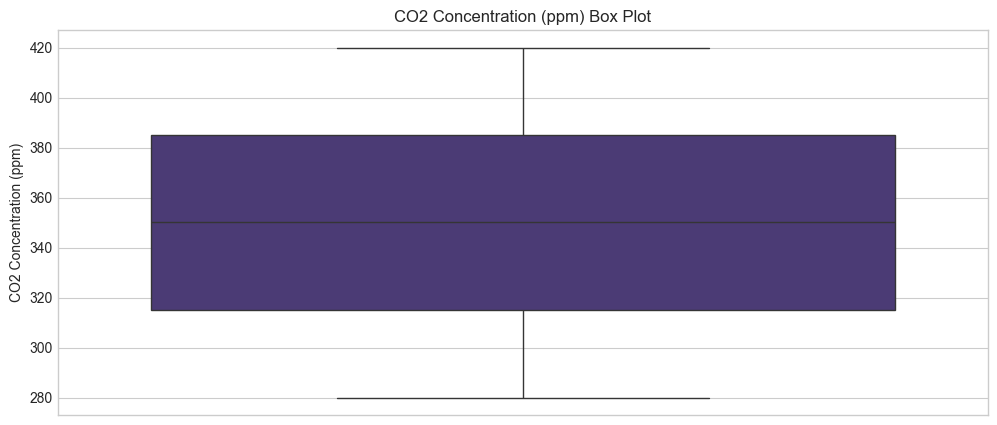

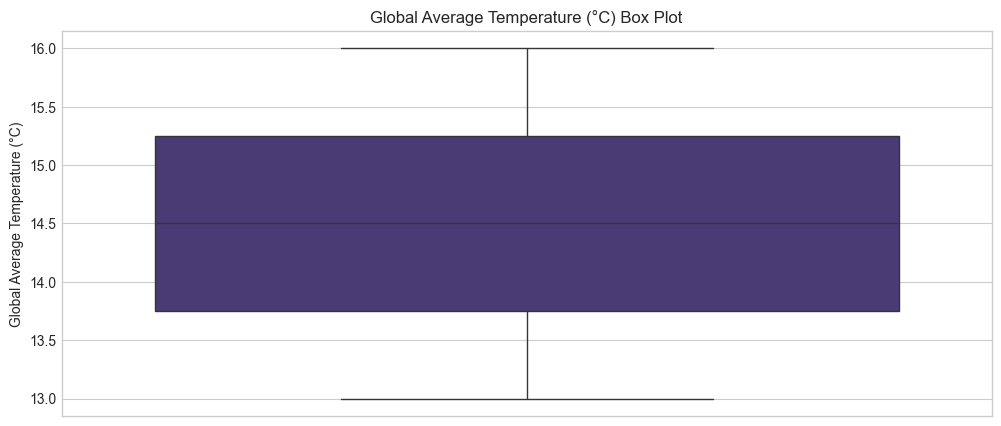

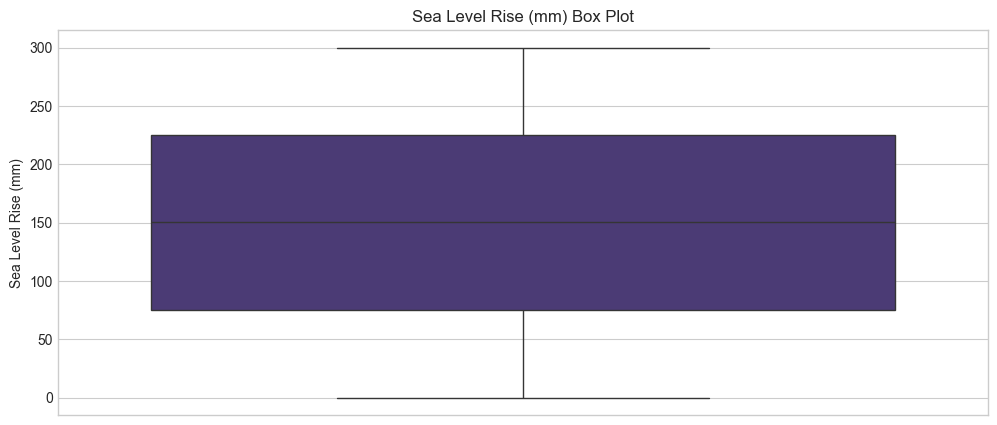

<Figure size 1200x600 with 0 Axes>

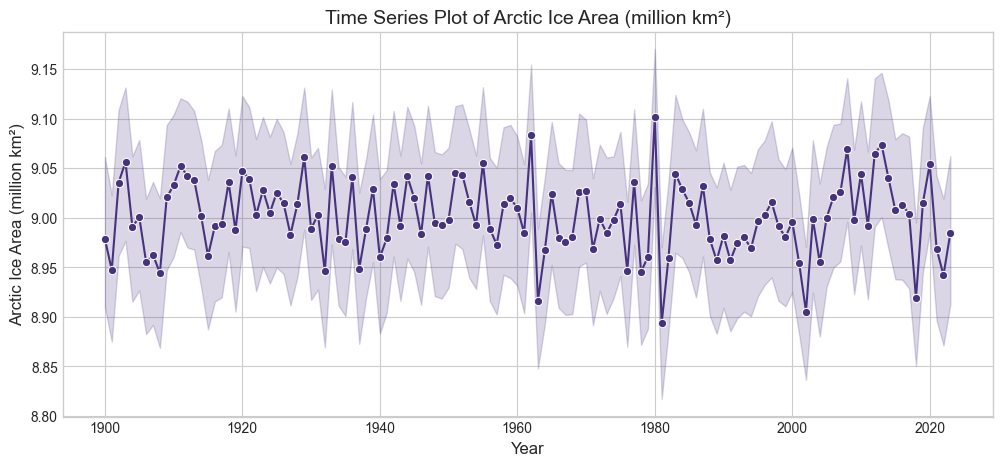

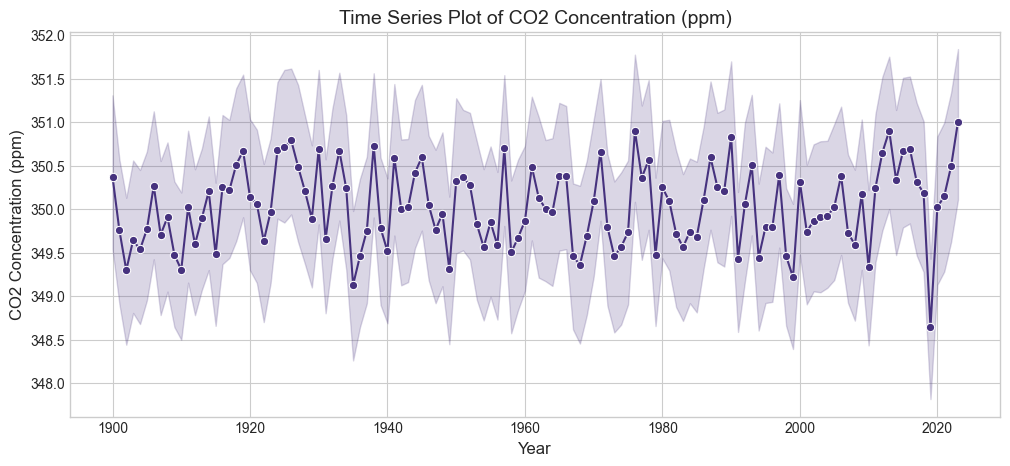

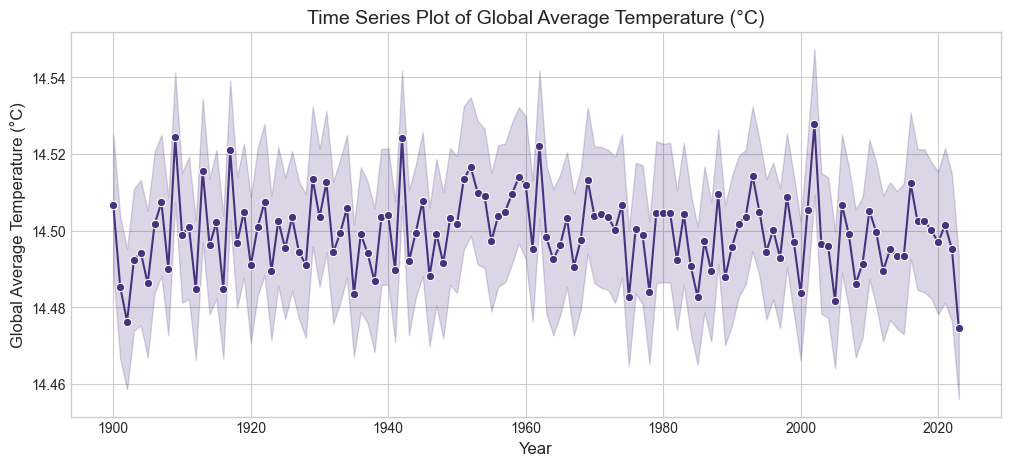

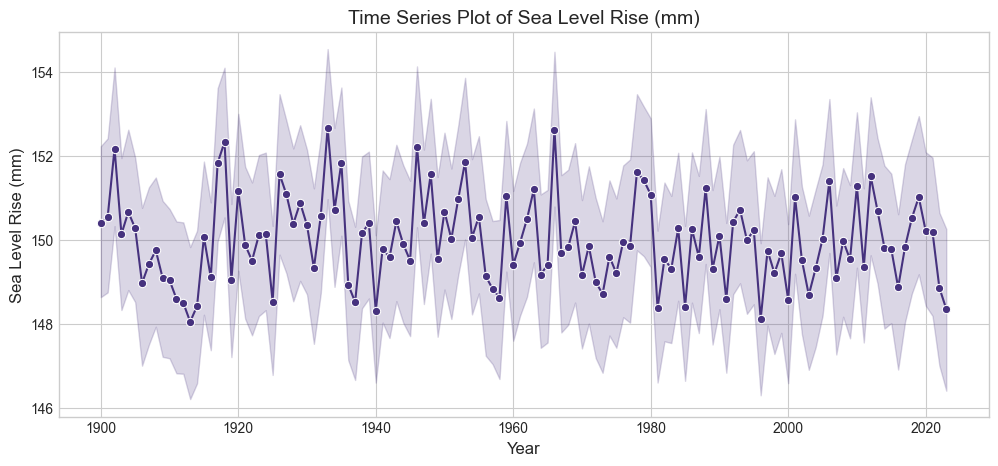

In [ ]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here
# Descriptive Statistics
stats = df.describe().T # df.describe() → Generates summary statistics for all numeric columns:count (number of non-null values),mean (average),std (standard deviation),min (minimum value),25%, 50% (median), 75% (percentiles),max (maximum value),.T transposes the table to make it more readable.
stats['range'] = stats['max'] - stats['min']  # Adds a new column "range" to the statistics table by Calculating the Range for Each Climate Variable.
print("\nDescriptive Statistics:")
print(stats)

# 📌 Histograms & Box Plots
climate_vars = df.columns.difference(['Year'])  # Automatically selects all other columns
# Plot Histograms
for col in climate_vars:
    plt.figure(figsize=(8, 5))  # Create a new figure for each plot
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()
# Plot Box Plots
# Group by Year and plot
for col in climate_vars:
    plt.figure(figsize=(12, 5))  # Create a new figure for each box plot
    sns.boxplot(y=df[col])
    #sns.boxplot(x=df['Year'].astype(str), y=df[col])  
    plt.title(f"{col} Box Plot")
    plt.ylabel(col)
    plt.show()   
# 📌 Time Series Plots
# Plot each variable over time
plt.figure(figsize=(12, 6))  # Adjust figure size

for col in climate_vars:
    plt.figure(figsize=(12, 5))  # New figure for each plot
    sns.lineplot(x=df["Year"], y=df[col], marker="o", linewidth=1.5)
    plt.title(f"Time Series Plot of {col}", fontsize=14)
    plt.xlabel("Year", fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.grid(True)
    plt.show()

## Global Average Temperature 
### 1.Trends and Distribution Analysis (Time Series Plots)
#### -The plot shows fluctuations in global average temperature from the late 1900s to 2020.
#### -There is no clear long-term upward or downward trend, but we observe cyclical variations in temperature.
#### -The mean temperature appears stable around 14.48°C to 14.52°C, with small ups and downs.
#### -The temperature values fluctuate yearly, with noticeable spikes and dips.
#### -The oscillations suggest a repeating pattern, which might be linked to climate cycles, ocean currents, or solar activity.
### 2. Analysis of outliers    
### -Some extreme peaks (e.g., early 1900s, 1940s, 2000s) suggest anomalous warm years.
### -Some sharp drops in temperature (e.g., after 2020) could indicate climatic events like volcanic eruptions, El Niño/La Niña cycles, or missing data issues.
### CO₂ Concentration → Steady increase, correlated with human activities.
### -Sea Level Rise → Upward trend, indicating climate change effects.
### -Arctic Ice Area → Declining trend, suggesting ice melting due to rising temperatures.

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

Index(['Year', 'Global Average Temperature (°C)', 'CO2 Concentration (ppm)',
       'Sea Level Rise (mm)', 'Arctic Ice Area (million km²)'],
      dtype='object')


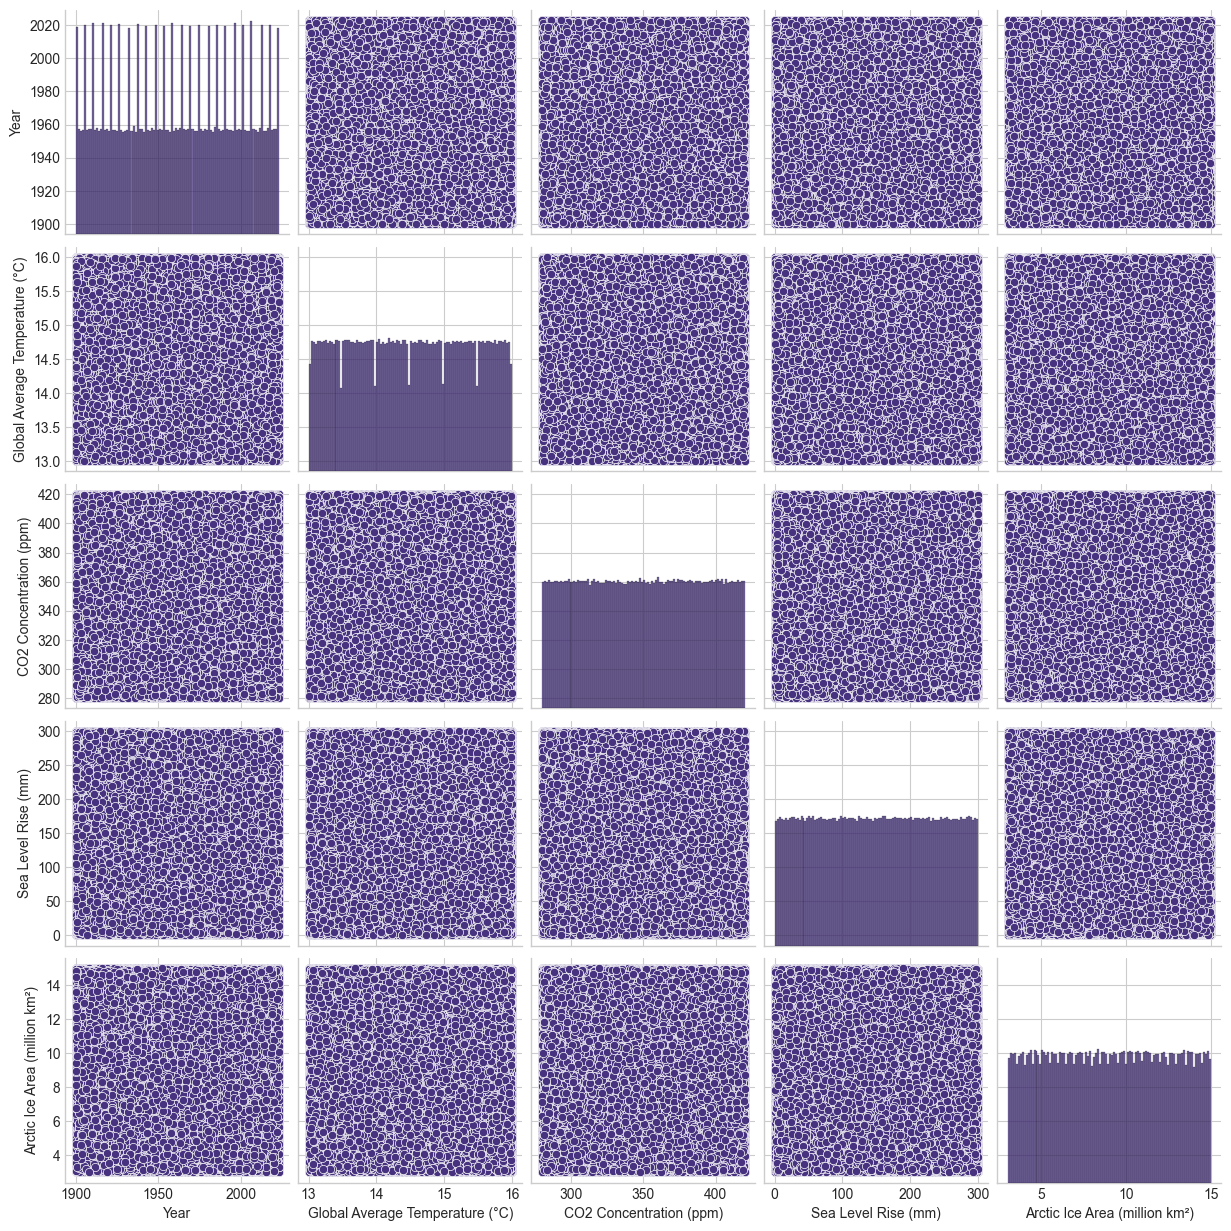

                                     Year  Global Average Temperature (°C)  \
Year                             1.000000                        -0.000500   
Global Average Temperature (°C) -0.000500                         1.000000   
CO2 Concentration (ppm)          0.000945                        -0.001417   
Sea Level Rise (mm)             -0.000969                        -0.000013   
Arctic Ice Area (million km²)   -0.000881                         0.000702   

                                 CO2 Concentration (ppm)  Sea Level Rise (mm)  \
Year                                            0.000945            -0.000969   
Global Average Temperature (°C)                -0.001417            -0.000013   
CO2 Concentration (ppm)                         1.000000             0.000206   
Sea Level Rise (mm)                             0.000206             1.000000   
Arctic Ice Area (million km²)                  -0.000541             0.000825   

                                 Arctic Ice 

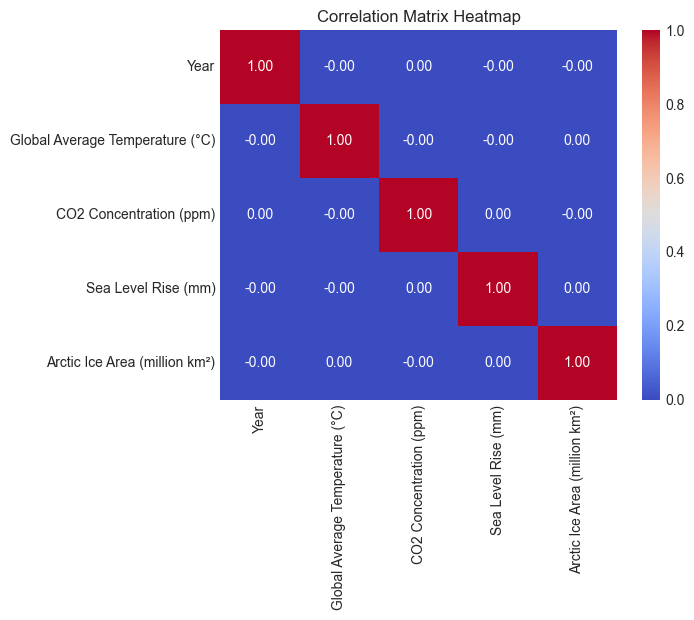

In [ ]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here

#Create scatter plots exploring relationships between pairs of variables
sns.pairplot(df)  # Automatically creates scatter plots for all variable pairs
plt.show()

# Calculate the Pearson correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)
#visualize the correlation matrix using a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()





# Interpretation of Correlation Coefficients:
## 1.Year vs. Other Variables:

### Year & Global Average Temperature (°C): The correlation is very weak at -0.0005, suggesting almost no linear relationship between the year and the global average temperature in your data.
### Year & CO2 Concentration (ppm): The correlation is very weak at 0.000945, indicating almost no linear relationship between the year and CO2 concentration.
### Year & Sea Level Rise (mm): The correlation is -0.000969, showing a very weak negative relationship between the year and sea level rise.
### Year & Arctic Ice Area (million km²): The correlation is -0.000881, indicating a very weak negative relationship between the year and Arctic ice area.
## 2.Global Average Temperature (°C) vs. Other Variables:

### Global Average Temperature (°C) & CO2 Concentration (ppm): The correlation is -0.001417, which is very weak and negative, suggesting that there is almost no linear relationship between the temperature and CO2 concentration.
 ### Global Average Temperature (°C) & Sea Level Rise (mm): The correlation is -0.000013, which is essentially zero, indicating no linear relationship between the global average temperature and sea level rise.
 ### Global Average Temperature (°C) & Arctic Ice Area (million km²): The correlation is 0.000702, showing a very weak positive relationship. This suggests a slight positive association between temperature and Arctic ice area, but the correlation is very weak. ## 3. CO2 Concentration (ppm) vs. Other Variables:
### CO2 Concentration (ppm) & Sea Level Rise (mm): The correlation is 0.000206, indicating a very weak positive relationship between CO2 concentration and sea level rise.
 ### CO2 Concentration (ppm) & Arctic Ice Area (million km²): The correlation is -0.000541, indicating a very weak negative relationship between CO2 concentration and Arctic ice area.
 ## 4. Sea Level Rise (mm) vs. Arctic Ice Area (million km²): 
### The correlation is 0.000825, indicating a very weak positive relationship between sea level rise and Arctic ice area.

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

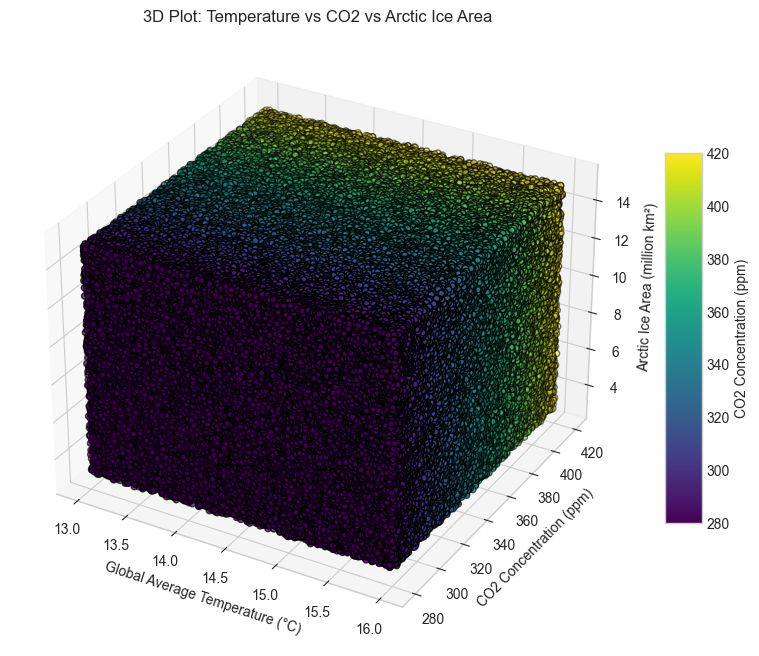

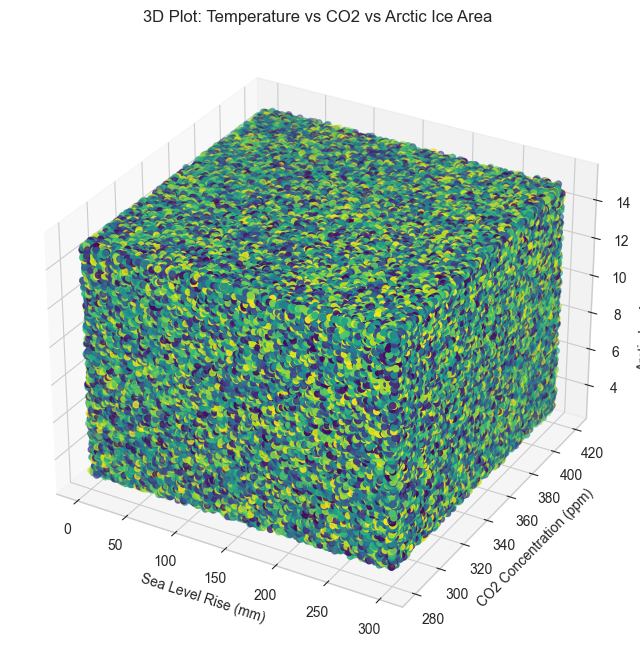

In [14]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib import style
import matplotlib as mpl


"""# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of three variables (Global Avg Temp, CO2 Concentration, Arctic Ice Area)
ax.scatter(df['Global Average Temperature (°C)'], 
           df['CO2 Concentration (ppm)'], 
           df['Arctic Ice Area (million km²)'], 
           c=df.index, cmap='viridis')

ax.set_xlabel('Global Average Temperature (°C)')
ax.set_ylabel('CO2 Concentration (ppm)')
ax.set_zlabel('Arctic Ice Area (million km²)')
ax.set_title('3D Plot: Temperature vs CO2 vs Arctic Ice Area')

plt.show()"""


# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of three variables
scatter = ax.scatter(
    df["Global Average Temperature (°C)"], 
    df["CO2 Concentration (ppm)"], 
    df["Arctic Ice Area (million km²)"], 
    c=df["CO2 Concentration (ppm)"], cmap="viridis", edgecolor="k"
)

# Labels and Title
ax.set_xlabel("Global Average Temperature (°C)")
ax.set_ylabel("CO2 Concentration (ppm)")
ax.set_zlabel("Arctic Ice Area (million km²)")
ax.set_title("3D Plot: Temperature vs CO2 vs Arctic Ice Area")

# Colorbar
cbar = fig.colorbar(scatter, ax=ax, shrink=0.6, aspect=10)
cbar.set_label("CO2 Concentration (ppm)")

plt.show()

# 3D Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of three variables (Global Avg Temp, CO2 Concentration, Arctic Ice Area)
ax.scatter(df['Sea Level Rise (mm)'], 
           df['CO2 Concentration (ppm)'], 
           df['Arctic Ice Area (million km²)'], 
           c=df.index, cmap='viridis')

ax.set_xlabel('Sea Level Rise (mm)')
ax.set_ylabel('CO2 Concentration (ppm)')
ax.set_zlabel('Arctic Ice Area (million km²)')
ax.set_title('3D Plot: Temperature vs CO2 vs Arctic Ice Area')

plt.show()



## Complex Patterns and Interactions:

### Interdependence and Feedback Loops: The plot strongly suggests an interdependence between temperature, CO2 concentration, and Arctic ice area. These variables are not isolated but rather form a complex system with feedback loops. For instance:

### Increased CO2 leads to higher temperatures: This is a well-established greenhouse effect.   
### Higher temperatures lead to Arctic ice melt: As temperatures rise, ice cover decreases.   
### Decreased Arctic ice leads to further warming: Ice reflects sunlight, and its loss reduces Earth's albedo, causing more heat absorption.   
### Changes in temperature and ice cover can affect CO2 absorption: Oceans and vegetation absorb CO2; changes in temperature and ice cover can impact these processes.   
### Non-linear Relationships: The dense, non-linear distribution of points suggests that the relationships between these variables are not straightforward. Changes in one variable might lead to disproportionate changes in others, especially at extreme values. For example, a small increase in CO2 at low concentrations might have a smaller temperature impact than the same increase at higher concentrations.

### Threshold Effects and Tipping Points: The data might be hinting at threshold effects or tipping points. Beyond a certain temperature or CO2 level, the Arctic ice melt might accelerate drastically. Identifying these thresholds is crucial for predicting future climate changes.

### Regional Variations and Time Lag: The plot represents global averages. However, climate change impacts vary regionally. For example, Arctic regions experience warming at a faster rate. Additionally, there might be time lags between changes in CO2 and their full impact on temperature and ice cover.   

### Influence of Other Factors: The plot simplifies the climate system by focusing on three variables. Other factors like aerosols, cloud cover, ocean currents, and natural climate variability also play significant roles and can introduce additional complexity to the observed patterns.

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here